### Logistic Regression

In [288]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)

In [289]:
adult_df = pd.read_csv(r"C:\Users\hp\Downloads\Salary.csv",header=None)
adult_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [290]:
adult_df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
                    'marital_status', 'occupation', 'relationship',
                    'race', 'sex', 'capital_gain', 'capital_loss',
                    'hours_per_week', 'native_country', 'income']

adult_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [291]:
adult_df.shape

(32561, 15)

In [292]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [293]:
adult_df.describe(include="all")

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


### Pre processing the data

In [294]:
#create a copy of the dataframe
adult_df_rev = pd.DataFrame.copy(adult_df)

In [295]:
adult_df_rev.duplicated().sum()

np.int64(24)

In [296]:
adult_df_rev[adult_df_rev.duplicated()]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [297]:
adult_df_rev.drop_duplicates(inplace=True,keep="first")
adult_df_rev.shape

(32537, 15)

In [298]:
adult_df_rev.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [299]:
adult_df_rev

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [300]:
adult_df_rev.drop(["education_num","fnlwgt","marital_status"],axis=1,inplace=True)
adult_df_rev.shape

(32537, 12)

In [301]:
adult_df_rev.dtypes

age                int64
workclass         object
education         object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [302]:
for i in adult_df_rev.columns:
    print({i:adult_df_rev[i].unique()})

{'age': array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87])}
{'workclass': array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)}
{'education': array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)}
{'occupation': array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',


In [303]:
adult_df_rev.replace(' ?', np.nan,inplace=True)

In [304]:
adult_df_rev.isnull().sum()/len(adult_df_rev)*100

age               0.000000
workclass         5.642807
education         0.000000
occupation        5.664321
relationship      0.000000
race              0.000000
sex               0.000000
capital_gain      0.000000
capital_loss      0.000000
hours_per_week    0.000000
native_country    1.788733
income            0.000000
dtype: float64

In [305]:
adult_df_rev.dtypes

age                int64
workclass         object
education         object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [306]:
adult_df_rev.workclass.mode()[0]

' Private'

In [307]:
adult_df_rev.occupation.mode()[0]

' Prof-specialty'

In [308]:
adult_df_rev.native_country.mode()[0]

' United-States'

In [309]:
#adult_df_rev["workclass"].fillna(adult_df_rev.workclass.mode()[0])

In [310]:
#replace the missing values with mode values
for value in ['workclass', 'occupation','native_country']:
    adult_df_rev[value].fillna(adult_df_rev[value].mode()[0],inplace=True)

In [311]:
adult_df_rev.isnull().sum()
#adult_df_rev.head()

age               0
workclass         0
education         0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [312]:
adult_df_rev.shape

(32537, 12)

In [313]:
"""
for x in adult_df_rev.columns:
    if adult_df_rev[x].dtype=='object' or adult_df_rev[x].dtype=='bool':
        adult_df_rev[x].fillna(adult_df_rev[x].mode()[0],inplace=True)
    elif adult_df_rev[x].dtype=='int64' or adult_df_rev[x].dtype=='float64':
        adult_df_rev[x].fillna(round(adult_df_rev[x].mean()),inplace=True)
"""

"\nfor x in adult_df_rev.columns:\n    if adult_df_rev[x].dtype=='object' or adult_df_rev[x].dtype=='bool':\n        adult_df_rev[x].fillna(adult_df_rev[x].mode()[0],inplace=True)\n    elif adult_df_rev[x].dtype=='int64' or adult_df_rev[x].dtype=='float64':\n        adult_df_rev[x].fillna(round(adult_df_rev[x].mean()),inplace=True)\n"

In [314]:
adult_df_rev.dtypes

age                int64
workclass         object
education         object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

### Dummy variables using pd.get_dummies()

In [315]:
adult_df_rev_new=pd.get_dummies(adult_df_rev)
adult_df_rev_new.head()

,age,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native_country_ Cambodia,native_country_ Canada,native_country_ China,native_country_ Columbia,native_country_ Cuba,native_country_ Dominican-Republic,native_country_ Ecuador,native_country_ El-Salvador,native_country_ England,native_country_ France,native_country_ Germany,native_country_ Greece,native_country_ Guatemala,native_country_ Haiti,native_country_ Holand-Netherlands,native_country_ Honduras,native_country_ Hong,native_country_ Hungary,native_country_ India,native_country_ Iran,native_country_ Ireland,native_country_ Italy,native_country_ Jamaica,native_country_ Japan,native_country_ Laos,native_country_ Mexico,native_country_ Nicaragua,native_country_ Outlying-US(Guam-USVI-etc),native_country_ Peru,native_country_ Philippines,native_country_ Poland,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,income_ <=50K,income_ >50K
0,39,2174,0,40,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
1,50,0,0,13,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
2,38,0,0,40,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
3,53,0,0,40,False,False,False,True,False,False,False,False,False,True

In [316]:
adult_df_rev_new.shape

(32537, 98)

In [317]:
adult_df_rev_new.dtypes

age                              int64
capital_gain                     int64
capital_loss                     int64
hours_per_week                   int64
workclass_ Federal-gov            bool
                                 ...  
native_country_ United-States     bool
native_country_ Vietnam           bool
native_country_ Yugoslavia        bool
income_ <=50K                     bool
income_ >50K                      bool
Length: 98, dtype: object

In [318]:
adult_df_rev.dtypes

age                int64
workclass         object
education         object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [319]:
colname=[]
for x in adult_df_rev.columns:
    if adult_df_rev[x].dtype=='object':
        colname.append(x)
colname

['workclass',
 'education',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [320]:
# For preprocessing the data
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for x in colname:
    adult_df_rev[x]=le.fit_transform(adult_df_rev[x])

    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)
    print('mapping', le_name_mapping)
    print('-----------------------')


Feature workclass
mapping {' Federal-gov': np.int64(0), ' Local-gov': np.int64(1), ' Never-worked': np.int64(2), ' Private': np.int64(3), ' Self-emp-inc': np.int64(4), ' Self-emp-not-inc': np.int64(5), ' State-gov': np.int64(6), ' Without-pay': np.int64(7)}
-----------------------
Feature education
mapping {' 10th': np.int64(0), ' 11th': np.int64(1), ' 12th': np.int64(2), ' 1st-4th': np.int64(3), ' 5th-6th': np.int64(4), ' 7th-8th': np.int64(5), ' 9th': np.int64(6), ' Assoc-acdm': np.int64(7), ' Assoc-voc': np.int64(8), ' Bachelors': np.int64(9), ' Doctorate': np.int64(10), ' HS-grad': np.int64(11), ' Masters': np.int64(12), ' Preschool': np.int64(13), ' Prof-school': np.int64(14), ' Some-college': np.int64(15)}
-----------------------
Feature occupation
mapping {' Adm-clerical': np.int64(0), ' Armed-Forces': np.int64(1), ' Craft-repair': np.int64(2), ' Exec-managerial': np.int64(3), ' Farming-fishing': np.int64(4), ' Handlers-cleaners': np.int64(5), ' Machine-op-inspct': np.int64(6), 

In [321]:
adult_df_rev.head()
#print(adult_df_rev.shape)
#0--> <=50K
#1--> >50K

,age,workclass,education,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,9,0,1,4,1,2174,0,40,38,0
1,50,5,9,3,0,4,1,0,0,13,38,0
2,38,3,11,5,1,4,1,0,0,40,38,0
3,53,3,1,5,0,2,1,0,0,40,38,0
4,28,3,9,9,5,2,0,0,0,40,4,0


In [322]:
data={"Gender":["Female", "Male","Female"],"Colour":["Red","Blue","Yellow"]}
df=pd.DataFrame(data)
df.head()

,Gender,Colour
0,Female,Red
1,Male,Blue
2,Female,Yellow


In [323]:
le_gender=LabelEncoder()
df["Gender"]=le_gender.fit_transform(df["Gender"])
df.head()

,Gender,Colour
0,0,Red
1,1,Blue
2,0,Yellow


In [324]:
colour = LabelEncoder()
df["Colour"] = colour.fit_transform(df["Colour"])
df

,Gender,Colour
0,0,1
1,1,0
2,0,2


In [325]:
df["Colour"] = colour.inverse_transform(df["Colour"])
df

,Gender,Colour
0,0,Red
1,1,Blue
2,0,Yellow


In [326]:
df["Gender"]=le_gender.inverse_transform(df["Gender"])
df.head()

,Gender,Colour
0,Female,Red
1,Male,Blue
2,Female,Yellow


In [327]:
adult_df_rev.dtypes

age               int64
workclass         int64
education         int64
occupation        int64
relationship      int64
race              int64
sex               int64
capital_gain      int64
capital_loss      int64
hours_per_week    int64
native_country    int64
income            int64
dtype: object

In [328]:
import seaborn as sns
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [329]:
tips["smoker"].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [330]:
tips["day"].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [331]:
tips["smoker"]=tips["smoker"].map({'Yes':1,"No":0})

In [332]:
tips["day"] = tips["day"].map({"Sun":1,"Thur":5,"Fri":6,"Sat":7})
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,0,1,Dinner,2
1,10.34,1.66,Male,0,1,Dinner,3
2,21.01,3.50,Male,0,1,Dinner,3
3,23.68,3.31,Male,0,1,Dinner,2
4,24.59,3.61,Female,0,1,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,0,7,Dinner,3
240,27.18,2.00,Female,1,7,Dinner,2
241,22.67,2.00,Male,1,7,Dinner,2
242,17.82,1.75,Male,0,7,Dinner,2


In [333]:
"""
Preprocessing of data:
1. Feature selection
2. Handling missing values [Mandatory]

Converting categorical values to numerical[Mandatory]
1.Manual encoding-->map()
df["Smoker"]=df["Smoker"].map({"yes":1,"no":0})

2.Create dummy variables-->pd.get_dummies(), OneHotEncoder()
Gender-->F,M,U
Gender_F	Gender_M	Gender_U
1		        0		  0
0		        1		  0
0		        0		  1

3.Creating levels-->LabelEncoder()
a. Identify the unique values present in the variable
b. Create a dictionary object into the memory with the unique values as the
keys and map the labels to the keys in ascending alphabetical order
	{"Private":2
	"Self-emp":3
	"Local-gov":1
	"Fed-gov":0
	}
c. Map the values into the actual variable and transform it.
2
2
0
2
1
"""

'\nPreprocessing of data:\n1. Feature selection\n2. Handling missing values [Mandatory]\n\nConverting categorical values to numerical[Mandatory]\n1.Manual encoding-->map()\ndf["Smoker"]=df["Smoker"].map({"yes":1,"no":0})\n\n2.Create dummy variables-->pd.get_dummies(), OneHotEncoder()\nGender-->F,M,U\nGender_F\tGender_M\tGender_U\n1\t\t        0\t\t  0\n0\t\t        1\t\t  0\n0\t\t        0\t\t  1\n\n3.Creating levels-->LabelEncoder()\na. Identify the unique values present in the variable\nb. Create a dictionary object into the memory with the unique values as the\nkeys and map the labels to the keys in ascending alphabetical order\n\t{"Private":2\n\t"Self-emp":3\n\t"Local-gov":1\n\t"Fed-gov":0\n\t}\nc. Map the values into the actual variable and transform it.\n2\n2\n0\n2\n1\n'

In [334]:
adult_df_rev["income"].value_counts(normalize=True)*100

income
0    75.907428
1    24.092572
Name: proportion, dtype: float64

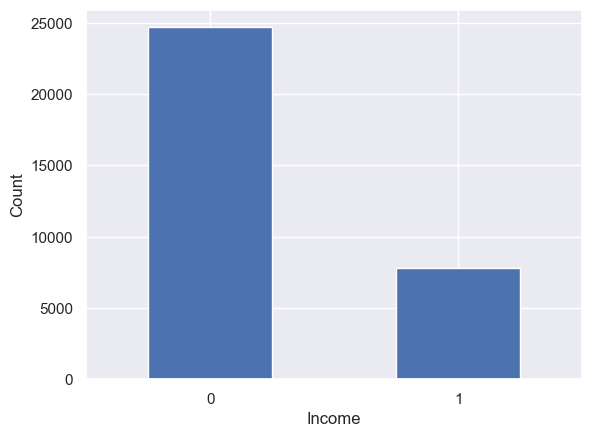

In [335]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
income_plot=adult_df_rev['income'].value_counts().plot(kind='bar')
plt.xlabel('Income')
plt.ylabel('Count')
plt.xticks(rotation=360)
plt.show()

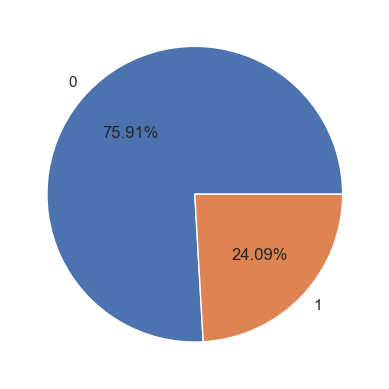

In [336]:
income_plot=adult_df_rev['income'].value_counts().plot(kind='pie',
                                                       autopct="%.2f%%")
plt.ylabel(None);

In [337]:
X = adult_df_rev.values[:,0:-1]  #-->0 to -2
Y = adult_df_rev.values[:,-1]
#.values will return an array whereas .iloc will return a df object
#arrays are lighter in weight which indirectly help the model to build faster

In [338]:
print(X.shape)
print(Y.shape)

(32537, 11)
(32537,)


In [339]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)
X = scaler.transform(X)
#X=scaler.fit_transform(X)
#print(X)

In [340]:
print(X)

[[ 0.03038995  2.62344898 -0.33526611 ... -0.21674317 -0.03566374
   0.26113115]
 [ 0.8369732   1.72054053 -0.33526611 ... -0.21674317 -2.22248299
   0.26113115]
 [-0.0429358  -0.08527638  0.18151876 ... -0.21674317 -0.03566374
   0.26113115]
 ...
 [ 1.42357919 -0.08527638  0.18151876 ... -0.21674317 -0.03566374
   0.26113115]
 [-1.2161478  -0.08527638  0.18151876 ... -0.21674317 -1.65552985
   0.26113115]
 [ 0.9836247   0.81763207  0.18151876 ... -0.21674317 -0.03566374
   0.26113115]]


In [341]:
Y.dtype

dtype('int64')

In [342]:
Y=Y.astype(int)

### Running a basic model

In [343]:
from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,
                                                    random_state=10)


In [344]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(22775, 11)
(22775,)
(9762, 11)
(9762,)


In [345]:
from sklearn.linear_model import LogisticRegression
#create a model
classifier=LogisticRegression()
#fitting training data to the model
classifier.fit(X_train,Y_train)


LogisticRegression()

In [346]:
Y_pred_prob=classifier.predict_proba(X_test)
Y_pred_prob

array([[0.86495581, 0.13504419],
       [0.97654711, 0.02345289],
       [0.84865539, 0.15134461],
       ...,
       [0.88668023, 0.11331977],
       [0.93548984, 0.06451016],
       [0.89405115, 0.10594885]])

In [347]:
Y_pred = classifier.predict(X_test)
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [348]:
print(list(zip(Y_test,Y_pred)))

[(np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(1), np.int64(1)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(1), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(1), np.int64(0)), (np.int64(1), np.int64(1)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(1), np.int64(1)), (np.int64(1), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(1), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(1), np.int64(0)), (np.int64(1), np.int64(1)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.int64(0)), (np.int64(0), np.in

In [349]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[7098  298]
 [1627  739]]
Classification report: 
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      7396
           1       0.71      0.31      0.43      2366

    accuracy                           0.80      9762
   macro avg       0.76      0.64      0.66      9762
weighted avg       0.79      0.80      0.77      9762

Accuracy of the model:  0.8028068018848596


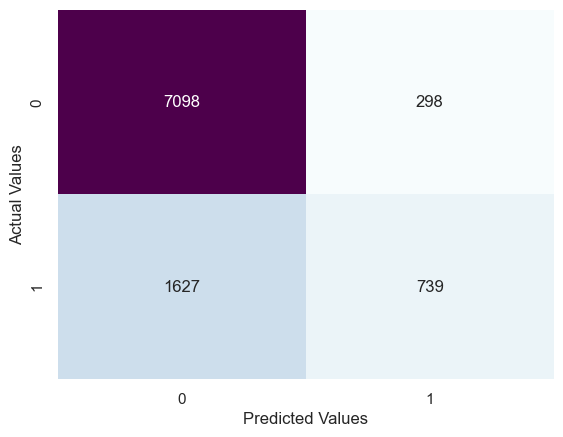

Classification report:
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      7396
           1       0.71      0.31      0.43      2366

    accuracy                           0.80      9762
   macro avg       0.76      0.64      0.66      9762
weighted avg       0.79      0.80      0.77      9762

Accuracy of the model:  0.8028068018848596


In [350]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")
print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

**Accuracy:**   
One of the more obvious metrics, it is the measure of all the correctly identified cases. It is most used when all the classes are equally important.In logistic regression classification accuracy score will help to justify how good is the model performing on correct predictions.

**Precision:**(column - wise)  
It is implied as the measure of the correctly identified positive cases from all the predicted positive cases.  
Thus, it is useful when the costs of False Positives is high.    
Precision tells us about how relevant are our predictions i.e.  
Out of all predicted results how many are accurately predicted.   
**Class 0:** How many -ve predictions are correct?
=TN / TN + FN   

**Class 1:** How many +ve predictions are correct?
=TP / TP + FP  

**Recall:**(row-wise)  
It is the measure of the correctly identified positive cases from all the actual positive cases.  
It is important when the cost of False Negatives is high.  
Recall will help to understand the accuracy of the individual classes.

**Class 0 :** How many -ve cases did we catch?  
Specificity / True Negative Rate  
Specificity formula :  TN / TN + FP

**Specificity** tells us what proportion of the negative class got correctly classified.

False Negative Rate:
FNR = FN / TP + FN   
False Negative Rate (FNR) tells us what proportion of the positive class got incorrectly classified by  
the classifier.

A higher TPR and a lower FNR are desirable since we want to classify the positive class correctly.

**Class 1 :** How many +ve cases did we catch?  
Sensitivity / True Positive Rate  
Sensitivity formula : TP / TP + FN  

**Sensitivity** tells us what proportion of the positive class got correctly classified.

False Positive Rate:
FPR = FP / FP + TN  
FPR tells us what proportion of the negative class got incorrectly classified by the classifier.

A higher TNR and a lower FPR are desirable since we want to classify the negative class correctly.

**F1-score:**  
This is the harmonic mean of Precision and Recall and gives a better measure of the   
incorrectly classified cases than the Accuracy Metric.

We use the Harmonic Mean since it penalizes the extreme values.  

**To summarise the differences between the F1-score and the accuracy,**

* Accuracy is used when the True Positives and True negatives are more important while F1-score is used when the False Negatives and False Positives are crucial
* Accuracy can be used when the class distribution is similar while F1-score is a better metric when there are imbalanced classes as in the above case.
* In most real-life classification problems, imbalanced class distribution exists and thus F1-score is a better metric to evaluate our model on.

**Support:**  
No. of observations in each class.

## Model tuning
### Adjusting the threshold

In [351]:
# store the predicted probabilities
y_pred_prob = classifier.predict_proba(X_test)
print(y_pred_prob)

[[0.86495581 0.13504419]
 [0.97654711 0.02345289]
 [0.84865539 0.15134461]
 ...
 [0.88668023 0.11331977]
 [0.93548984 0.06451016]
 [0.89405115 0.10594885]]


In [352]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.42:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
#print(y_pred_class)

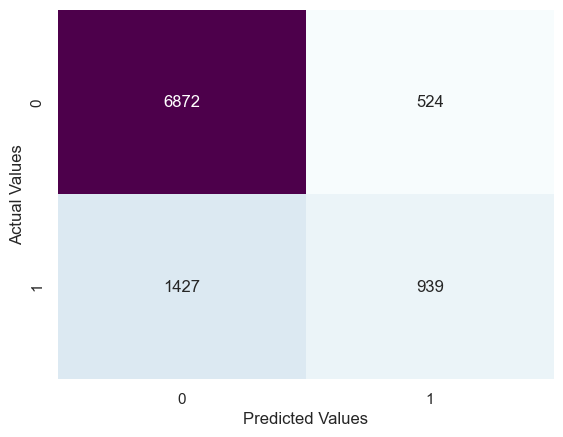

Classification report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      7396
           1       0.64      0.40      0.49      2366

    accuracy                           0.80      9762
   macro avg       0.73      0.66      0.68      9762
weighted avg       0.78      0.80      0.78      9762

Accuracy of the model:  0.8001434132349928


In [353]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,y_pred_class)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


print("Classification report:")

print(classification_report(Y_test,y_pred_class))

acc=accuracy_score(Y_test,y_pred_class)
print("Accuracy of the model: ",acc)

In [354]:
for a in np.arange(0.4,0.61,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :",
          cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.4 : 1975  , type 2 error : 1371  , type 1 error: 604
Errors at threshold  0.41000000000000003 : 1970  , type 2 error : 1401  , type 1 error: 569
Errors at threshold  0.42000000000000004 : 1951  , type 2 error : 1427  , type 1 error: 524
Errors at threshold  0.43000000000000005 : 1945  , type 2 error : 1456  , type 1 error: 489
Errors at threshold  0.44000000000000006 : 1956  , type 2 error : 1494  , type 1 error: 462
Errors at threshold  0.45000000000000007 : 1953  , type 2 error : 1516  , type 1 error: 437
Errors at threshold  0.4600000000000001 : 1952  , type 2 error : 1543  , type 1 error: 409
Errors at threshold  0.4700000000000001 : 1949  , type 2 error : 1568  , type 1 error: 381
Errors at threshold  0.4800000000000001 : 1941  , type 2 error : 1587  , type 1 error: 354
Errors at threshold  0.4900000000000001 : 1932  , type 2 error : 1610  , type 1 error: 322
Errors at threshold  0.5000000000000001 : 1925  , type 2 error : 1627  , type 1 error: 298
Errors at

## Introducting test data

In [355]:
adult_test = pd.read_csv(r"C:\Users\hp\Downloads\Salary_Test.csv",
                       header = None)

adult_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [356]:
adult_test.shape

(16281, 15)

In [357]:
adult_test.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
                    'marital_status', 'occupation', 'relationship',
                    'race', 'sex', 'capital_gain', 'capital_loss',
                    'hours_per_week', 'native_country', 'income']

adult_test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [358]:
adult_test.describe(include="all")

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,16281.000000,16281,1.628100e+04,16281,16281.000000,16281,16281,16281,16281,16281,16281.000000,16281.000000,16281.000000,16281,16281
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K.
freq,NaN,11210,NaN,5283,NaN,7403,2032,6523,13946,10860,NaN,NaN,NaN,14662,12435
mean,38.767459,NaN,1.894357e+05,NaN,10.072907,NaN,NaN,NaN,NaN,NaN,1081.905104,87.899269,40.392236,NaN,NaN
std,13.849187,NaN,1.057149e+05,NaN,2.567545,NaN,NaN,NaN,NaN,NaN,7583.935968,403.105286,12.479332,NaN,NaN
min,17.000000,NaN,1.349200e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.167360e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.778310e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.383840e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


### Preprocessing of data

In [359]:
adult_test.drop(["education_num","fnlwgt","marital_status"],axis=1,inplace=True)
adult_test.shape

(16281, 12)

In [360]:
adult_test.dtypes

age                int64
workclass         object
education         object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [361]:
adult_test.isnull().sum()

age               0
workclass         0
education         0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [362]:
for i in adult_test.columns:
    print({i:adult_test[i].unique()})

{'age': array([25, 38, 28, 44, 18, 34, 29, 63, 24, 55, 65, 36, 26, 58, 48, 43, 20,
       37, 40, 72, 45, 22, 23, 54, 32, 46, 56, 17, 39, 52, 21, 42, 33, 30,
       47, 41, 19, 69, 50, 31, 59, 49, 51, 27, 57, 61, 64, 79, 73, 53, 77,
       80, 62, 35, 68, 66, 75, 60, 67, 71, 70, 90, 81, 74, 78, 82, 83, 85,
       76, 84, 89, 88, 87])}
{'workclass': array([' Private', ' Local-gov', ' ?', ' Self-emp-not-inc',
       ' Federal-gov', ' State-gov', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)}
{'education': array([' 11th', ' HS-grad', ' Assoc-acdm', ' Some-college', ' 10th',
       ' Prof-school', ' 7th-8th', ' Bachelors', ' Masters', ' Doctorate',
       ' 5th-6th', ' Assoc-voc', ' 9th', ' 12th', ' 1st-4th',
       ' Preschool'], dtype=object)}
{'occupation': array([' Machine-op-inspct', ' Farming-fishing', ' Protective-serv', ' ?',
       ' Other-service', ' Prof-specialty', ' Craft-repair',
       ' Adm-clerical', ' Exec-managerial', ' Tech-support', ' Sales',


In [363]:
adult_test.replace(' ?', np.nan,inplace=True)

In [364]:
adult_test.isnull().sum()

age                 0
workclass         963
education           0
occupation        966
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    274
income              0
dtype: int64

In [365]:
#replace the missing values with mode values
for value in ['workclass', 'occupation',
              'native_country']:
    adult_test[value].fillna(adult_test[value].mode()[0],inplace=True)

In [366]:
adult_test.isnull().sum()

age               0
workclass         0
education         0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [367]:
colname=[]
for x in adult_test.columns:
    if adult_test[x].dtype=='object':
        colname.append(x)
colname

['workclass',
 'education',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [368]:
# For preprocessing the data
from sklearn.preprocessing import LabelEncoder

for x in colname:
    adult_test[x]=le.fit_transform(adult_test[x])

In [369]:
adult_test.head()

,age,workclass,education,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,3,1,6,3,2,1,0,0,40,37,0
1,38,3,11,4,0,4,1,0,0,50,37,0
2,28,1,7,10,0,4,1,0,0,40,37,1
3,44,3,15,6,0,2,1,7688,0,40,37,1
4,18,3,15,9,3,4,0,0,0,30,37,0


In [370]:
adult_test.dtypes

age               int64
workclass         int64
education         int64
occupation        int64
relationship      int64
race              int64
sex               int64
capital_gain      int64
capital_loss      int64
hours_per_week    int64
native_country    int64
income            int64
dtype: object

In [371]:
X_test_new = adult_test.values[:,0:-1]  #-->0 to -2
Y_test_new = adult_test.values[:,-1]

In [372]:
Y_test_new.shape

(16281,)

In [373]:
X_test_new = scaler.transform(X_test_new)

In [374]:
print(X_test_new)

[[-0.99617055 -0.08527638 -2.4024056  ... -0.21674317 -0.03566374
   0.09594355]
 [-0.0429358  -0.08527638  0.18151876 ... -0.21674317  0.77426932
   0.09594355]
 [-0.7761933  -1.89109329 -0.85205098 ... -0.21674317 -0.03566374
   0.09594355]
 ...
 [-0.0429358  -0.08527638 -0.33526611 ... -0.21674317  0.77426932
   0.09594355]
 [ 0.3970187  -0.08527638 -0.33526611 ... -0.21674317 -0.03566374
   0.09594355]
 [-0.26291305  0.81763207 -0.33526611 ... -0.21674317  1.58420237
   0.09594355]]


In [375]:
Y_pred_prob=classifier.predict_proba(X_test_new)

In [376]:
Y_pred_prob

array([[0.95324343, 0.04675657],
       [0.69794893, 0.30205107],
       [0.81813328, 0.18186672],
       ...,
       [0.7083223 , 0.2916777 ],
       [0.57793075, 0.42206925],
       [0.69256651, 0.30743349]])

In [377]:
Y_pred_new=[]
for value in Y_pred_prob[:,1]:
    if value > 0.42:
        Y_pred_new.append(1)
    else:
        Y_pred_new.append(0)
print(Y_pred_new)

[0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 

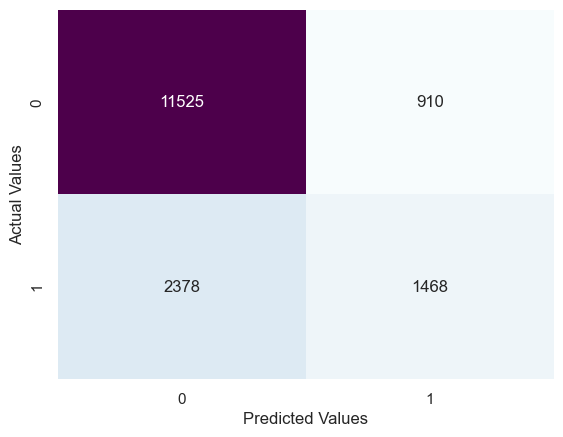

Classification report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88     12435
           1       0.62      0.38      0.47      3846

    accuracy                           0.80     16281
   macro avg       0.72      0.65      0.67     16281
weighted avg       0.78      0.80      0.78     16281

Accuracy of the model:  0.7980468030219274


In [378]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test_new,Y_pred_new)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


print("Classification report:")

print(classification_report(Y_test_new,Y_pred_new))

acc=accuracy_score(Y_test_new,Y_pred_new)
print("Accuracy of the model: ",acc)

In [379]:
adult_test["predicted"] = Y_pred_new
adult_test

,age,workclass,education,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,predicted
0,25,3,1,6,3,2,1,0,0,40,37,0,0
1,38,3,11,4,0,4,1,0,0,50,37,0,0
2,28,1,7,10,0,4,1,0,0,40,37,1,0
3,44,3,15,6,0,2,1,7688,0,40,37,1,1
4,18,3,15,9,3,4,0,0,0,30,37,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,3,9,9,1,4,0,0,0,36,37,0,0
16277,64,3,11,9,2,2,1,0,0,40,37,0,0
16278,38,3,9,9,0,4,1,0,0,50,37,0,0
16279,44,3,9,0,3,1,1,5455,0,40,37,0,1


In [380]:
adult_test = pd.read_csv(r"C:\Users\hp\Downloads\Salary_Test.csv",
                       header = None)

adult_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [381]:
adult_test.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
                    'marital_status', 'occupation', 'relationship',
                    'race', 'sex', 'capital_gain', 'capital_loss',
                    'hours_per_week', 'native_country', 'income']

adult_test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [382]:
adult_test["Predictions"]=Y_pred_new

In [383]:
adult_test["income"].unique()

array([' <=50K.', ' >50K.'], dtype=object)

In [384]:
adult_test["Predictions"] = adult_test["Predictions"].map({0:' <=50K.',1:' >50K.'})
adult_test

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,Predictions
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.,<=50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.,>50K.


In [385]:
adult_test.to_csv("Output Predictions.csv",header=True,index=False)

#### Overfitting: When Your Model Tries Too Hard
Overfitting occurs when a model learns the training data too well, including its noise and outliers. As a result, it performs poorly on unseen data because it’s too tailored to the specificities of the training set.


#### Underfitting: Oversimplifying the Problem
Underfitting is the opposite issue. Here, the model is too simple to capture the underlying patterns in the data. It underperforms even on the training data because it doesn’t learn enough from it.

### Running model using cross validation

In [386]:
#Using cross validation
classifier=LogisticRegression()

#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=10,random_state=10,shuffle=True)
#print(kfold_cv)

from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,
                                                 y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())

[0.80333626 0.80421422 0.82045654 0.78665496 0.80640913 0.80324989
 0.80368906 0.80632411 0.80676329 0.79490558]
0.8036003042988575


In [387]:
#model tuning
for train_value, test_value in kfold_cv.split(X_train, Y_train):
    classifier.fit(X_train[train_value], Y_train[train_value]).predict(X_train[test_value])

Y_pred=classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

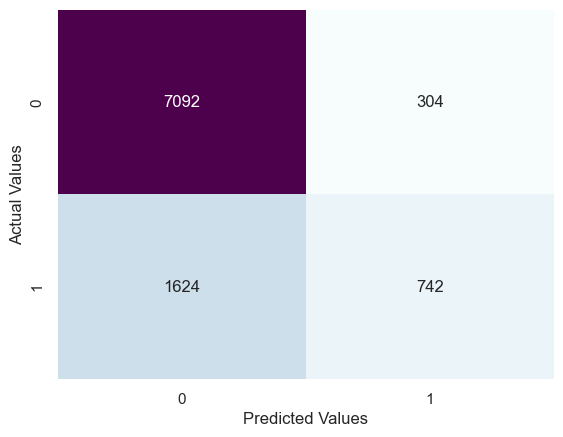


Classification report: 
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      7396
           1       0.71      0.31      0.43      2366

    accuracy                           0.80      9762
   macro avg       0.76      0.64      0.66      9762
weighted avg       0.79      0.80      0.77      9762

Accuracy of the model:  0.802499487809875


In [388]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()
print()

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)


In [389]:
#Using cross validation

classifier=LogisticRegression()

#performing kfold_cross_validation
from sklearn.model_selection import StratifiedKFold
kfold_cv=StratifiedKFold(n_splits=10,random_state=10,shuffle=True)
#print(kfold_cv)

from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,
                                                 y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())

[0.80377524 0.80904302 0.80421422 0.78884987 0.80377524 0.80456741
 0.80544576 0.80939833 0.80851998 0.80193237]
0.8039521450331849


In [390]:
#model tuning

for train_value, test_value in kfold_cv.split(X_train, Y_train):
    classifier.fit(X_train[train_value], Y_train[train_value]).predict(X_train[test_value])


Y_pred=classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

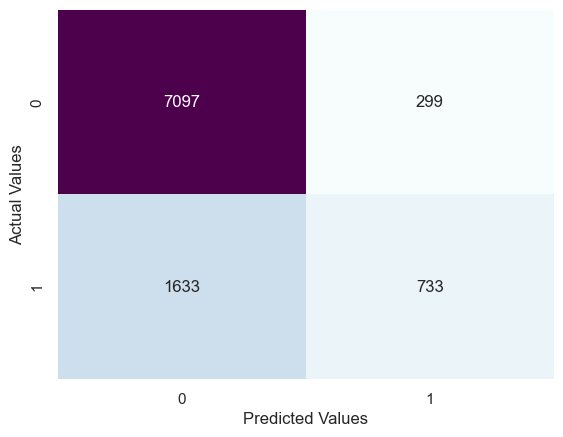


Classification report: 
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      7396
           1       0.71      0.31      0.43      2366

    accuracy                           0.80      9762
   macro avg       0.76      0.63      0.66      9762
weighted avg       0.79      0.80      0.77      9762

Accuracy of the model:  0.8020897357098955


In [391]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()
print()

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)


### Feature selection using Recursive Feature Elimination

Recursive Feature Elimination: 1st-All the independent variables (X) will be considered and the model will be built. It will eliminate the variable which has the least significance in the model. 2nd-(X-1) variables will be considered and the model will be rebuilt. The process continues till the time we are left off with the given no of variables in the model. RFE model will be ready to predict upon the testing data.

In [392]:
X = adult_df_rev.values[:,:-1]
Y = adult_df_rev.values[:,-1]

In [393]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)

X = scaler.transform(X)
print(X)

[[ 0.03038995  2.62344898 -0.33526611 ... -0.21674317 -0.03566374
   0.26113115]
 [ 0.8369732   1.72054053 -0.33526611 ... -0.21674317 -2.22248299
   0.26113115]
 [-0.0429358  -0.08527638  0.18151876 ... -0.21674317 -0.03566374
   0.26113115]
 ...
 [ 1.42357919 -0.08527638  0.18151876 ... -0.21674317 -0.03566374
   0.26113115]
 [-1.2161478  -0.08527638  0.18151876 ... -0.21674317 -1.65552985
   0.26113115]
 [ 0.9836247   0.81763207  0.18151876 ... -0.21674317 -0.03566374
   0.26113115]]


In [394]:
from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [395]:
from sklearn.linear_model import LogisticRegression
#create a model
classifier=LogisticRegression()

In [396]:
colname=adult_df_rev.columns

In [397]:
from sklearn.feature_selection import RFE
rfe = RFE(classifier, n_features_to_select=7)
model_rfe = rfe.fit(X_train, Y_train)
print("Num Features: ",model_rfe.n_features_)
print("Selected Features: ")
print(list(zip(colname, model_rfe.support_)))
print("Feature Ranking: ", model_rfe.ranking_)

Num Features:  7
Selected Features: 
[('age', np.True_), ('workclass', np.False_), ('education', np.True_), ('occupation', np.False_), ('relationship', np.True_), ('race', np.False_), ('sex', np.True_), ('capital_gain', np.True_), ('capital_loss', np.True_), ('hours_per_week', np.True_), ('native_country', np.False_)]
Feature Ranking:  [1 3 1 4 1 2 1 1 1 1 5]


In [398]:
Y_pred=model_rfe.predict(X_test)

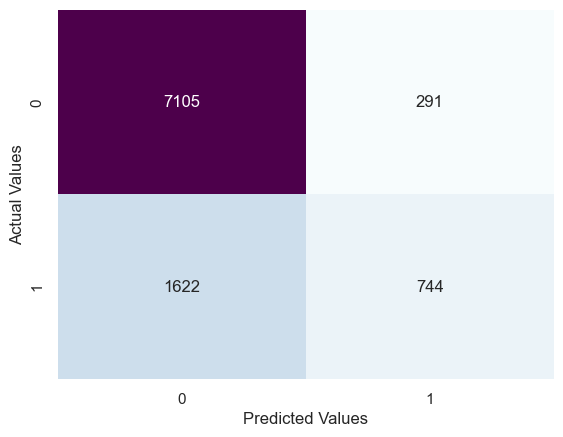


Classification report: 
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      7396
           1       0.72      0.31      0.44      2366

    accuracy                           0.80      9762
   macro avg       0.77      0.64      0.66      9762
weighted avg       0.79      0.80      0.77      9762

Accuracy of the model:  0.8040360581847982


In [399]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()
print()

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

In [400]:
new_data=adult_df_rev[['age','workclass','occupation','sex','capital_gain','hours_per_week','income']]
new_data.head()
new_X=new_data.values[:,:-1]
new_Y=new_data.values[:,-1]
print(new_X)
print(new_Y)

#in case the RFE eliminates logically relevant variables, create a  new df manually by subsetting the variables derived from RFE as well as on the basis of domain knowledge.
#rest of the model building steps will have to be performed manually

[[   39     6     0     1  2174    40]
 [   50     5     3     1     0    13]
 [   38     3     5     1     0    40]
 ...
 [   58     3     0     0     0    40]
 [   22     3     0     1     0    20]
 [   52     4     3     0 15024    40]]
[0 0 0 ... 0 0 1]


In [401]:
from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(new_X, new_Y, test_size=0.3,random_state=10)

In [402]:
from sklearn.linear_model import LogisticRegression
#create a model
classifier=LogisticRegression()
#fitting training data to the model
classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)
print(Y_pred)

[0 0 0 ... 0 0 0]


In [403]:
Y_pred_prob=classifier.predict_proba(X_test)

In [404]:
for i in Y_pred_prob:
    print(i)

[0.81268833 0.18731167]
[0.77720178 0.22279822]
[0.74714845 0.25285155]
[0.91460402 0.08539598]
[0.74330475 0.25669525]
[0.17409583 0.82590417]
[0.74076779 0.25923221]
[0.57859269 0.42140731]
[0.72189933 0.27810067]
[0.93337704 0.06662296]
[0.91641046 0.08358954]
[0.71119238 0.28880762]
[0.93850704 0.06149296]
[0.85329266 0.14670734]
[0.71296109 0.28703891]
[0.92035768 0.07964232]
[0.941926 0.058074]
[0.92152174 0.07847826]
[0.65894622 0.34105378]
[0.70181716 0.29818284]
[0.01510268 0.98489732]
[0.64541427 0.35458573]
[0.88442849 0.11557151]
[0.74623586 0.25376414]
[0.67928684 0.32071316]
[0.79274003 0.20725997]
[0.934654 0.065346]
[0.69427663 0.30572337]
[0.92477067 0.07522933]
[0.85435524 0.14564476]
[0.17834428 0.82165572]
[0.69291446 0.30708554]
[0.62679214 0.37320786]
[0.71596543 0.28403457]
[0.68497467 0.31502533]
[0.76954474 0.23045526]
[0.94981534 0.05018466]
[0.32452014 0.67547986]
[0.9332079 0.0667921]
[0.7466812 0.2533188]
[0.69971213 0.30028787]
[0.91321222 0.08678778]
[0.7

[0.80034022 0.19965978]
[0.80557904 0.19442096]
[0.64031822 0.35968178]
[0.92379769 0.07620231]
[0.76704039 0.23295961]
[0.61584858 0.38415142]
[0.93848366 0.06151634]
[0.738927 0.261073]
[0.72247998 0.27752002]
[0.93477253 0.06522747]
[0.7359907 0.2640093]
[0.7230913 0.2769087]
[0.82413969 0.17586031]
[0.61391063 0.38608937]
[0.7168475 0.2831525]
[0.73543742 0.26456258]
[0.66562093 0.33437907]
[0.90335872 0.09664128]
[0.93766573 0.06233427]
[0.61504175 0.38495825]
[0.76849956 0.23150044]
[0.79932864 0.20067136]
[0.68963703 0.31036297]
[0.79887765 0.20112235]
[0.51059047 0.48940953]
[0.76892403 0.23107597]
[0.7028618 0.2971382]
[0.6827267 0.3172733]
[0.79112414 0.20887586]
[0.83187944 0.16812056]
[0.89868728 0.10131272]
[0.92604835 0.07395165]
[0.66652727 0.33347273]
[0.68534509 0.31465491]
[0.79162786 0.20837214]
[0.86892005 0.13107995]
[0.92207441 0.07792559]
[0.73108283 0.26891717]
[0.60825249 0.39174751]
[0.7807873 0.2192127]
[0.92091363 0.07908637]
[0.85031593 0.14968407]
[0.60246

[0.72348468 0.27651532]
[0.76598508 0.23401492]
[0.82237694 0.17762306]
[0.82208965 0.17791035]
[0.67318948 0.32681052]
[0.61391063 0.38608937]
[0.83443289 0.16556711]
[0.54525794 0.45474206]
[0.57378308 0.42621692]
[0.64909323 0.35090677]
[0.92338156 0.07661844]
[0.72161918 0.27838082]
[0.75826939 0.24173061]
[0.61391063 0.38608937]
[0.75842401 0.24157599]
[0.92645115 0.07354885]
[0.94746368 0.05253632]
[0.73268874 0.26731126]
[0.626252 0.373748]
[0.73091691 0.26908309]
[0.61504175 0.38495825]
[0.83455824 0.16544176]
[0.59898566 0.40101434]
[0.63406749 0.36593251]
[0.82413969 0.17586031]
[0.93766573 0.06233427]
[0.93588149 0.06411851]
[0.82442438 0.17557562]
[0.74012482 0.25987518]
[0.90612436 0.09387564]
[0.71495487 0.28504513]
[0.59240667 0.40759333]
[0.69096642 0.30903358]
[0.76284205 0.23715795]
[0.75584156 0.24415844]
[0.49408004 0.50591996]
[0.54127652 0.45872348]
[0.94479389 0.05520611]
[0.55724495 0.44275505]
[0.79559641 0.20440359]
[0.79950851 0.20049149]
[0.78523786 0.214762

[0.61297846 0.38702154]
[0.88553777 0.11446223]
[0.91927681 0.08072319]
[0.67232405 0.32767595]
[0.81881531 0.18118469]
[0.84568596 0.15431404]
[0.91906809 0.08093191]
[0.62421208 0.37578792]
[0.93929155 0.06070845]
[0.93623442 0.06376558]
[0.56667512 0.43332488]
[0.68661527 0.31338473]
[0.94244228 0.05755772]
[0.93366569 0.06633431]
[0.82762387 0.17237613]
[0.76704039 0.23295961]
[0.94244228 0.05755772]
[0.59783821 0.40216179]
[0.52943265 0.47056735]
[0.81807398 0.18192602]
[0.64400539 0.35599461]
[0.76704039 0.23295961]
[0.78929572 0.21070428]
[0.83524093 0.16475907]
[0.63986541 0.36013459]
[0.59325372 0.40674628]
[0.8324285 0.1675715]
[0.83907975 0.16092025]
[0.65865294 0.34134706]
[0.85031593 0.14968407]
[0.50306043 0.49693957]
[0.52943265 0.47056735]
[0.67702554 0.32297446]
[0.7236607 0.2763393]
[0.94244228 0.05755772]
[0.78225669 0.21774331]
[0.75495261 0.24504739]
[0.77943867 0.22056133]
[0.95049098 0.04950902]
[0.87061055 0.12938945]
[0.92708272 0.07291728]
[0.7251189 0.2748811

[0.72065898 0.27934102]
[0.63190567 0.36809433]
[0.87899935 0.12100065]
[0.57326713 0.42673287]
[0.62202674 0.37797326]
[0.83314327 0.16685673]
[0.93848366 0.06151634]
[0.87986709 0.12013291]
[0.94405486 0.05594514]
[0.93390874 0.06609126]
[0.6236519 0.3763481]
[0.5010145 0.4989855]
[0.95558017 0.04441983]
[0.85585582 0.14414418]
[0.64982884 0.35017116]
[0.88103472 0.11896528]
[0.87486518 0.12513482]
[0.84108955 0.15891045]
[0.8988661 0.1011339]
[0.76466678 0.23533322]
[0.66049051 0.33950949]
[0.58254406 0.41745594]
[0.48186736 0.51813264]
[0.64265239 0.35734761]
[0.40567998 0.59432002]
[0.833684 0.166316]
[0.83578118 0.16421882]
[0.90933283 0.09066717]
[0.89868728 0.10131272]
[0.94448553 0.05551447]
[0.79183656 0.20816344]
[0.81090705 0.18909295]
[0.78595419 0.21404581]
[0.95330252 0.04669748]
[0.72908278 0.27091722]
[0.92062685 0.07937315]
[0.56050821 0.43949179]
[0.74513145 0.25486855]
[0.72869437 0.27130563]
[0.93411885 0.06588115]
[0.46046063 0.53953937]
[0.50453448 0.49546552]
[0

[0.61297846 0.38702154]
[0.7523384 0.2476616]
[0.63821333 0.36178667]
[0.91837322 0.08162678]
[0.491052 0.508948]
[0.87575837 0.12424163]
[0.93137892 0.06862108]
[0.74587727 0.25412273]
[0.75044247 0.24955753]
[0.81275772 0.18724228]
[0.8068576 0.1931424]
[0.8424414 0.1575586]
[0.82846346 0.17153654]
[0.67300382 0.32699618]
[0.85326362 0.14673638]
[0.75495261 0.24504739]
[0.55939179 0.44060821]
[0.90212248 0.09787752]
[0.95199422 0.04800578]
[0.94199674 0.05800326]
[0.76633722 0.23366278]
[0.63517466 0.36482534]
[0.67702554 0.32297446]
[0.55195373 0.44804627]
[0.86270387 0.13729613]
[0.51762496 0.48237504]
[0.75007419 0.24992581]
[0.73362287 0.26637713]
[0.45434252 0.54565748]
[0.91181209 0.08818791]
[0.42813486 0.57186514]
[0.84418563 0.15581437]
[0.88139157 0.11860843]
[0.86028181 0.13971819]
[0.68230079 0.31769921]
[0.84995802 0.15004198]
[0.89868728 0.10131272]
[0.71080011 0.28919989]
[0.83716945 0.16283055]
[0.82818395 0.17181605]
[0.56514755 0.43485245]
[0.72551772 0.27448228]
[0

[0.93150444 0.06849556]
[0.73108283 0.26891717]
[0.82762387 0.17237613]
[0.9286295 0.0713705]
[0.77202331 0.22797669]
[0.8634008 0.1365992]
[0.59512535 0.40487465]
[0.94665921 0.05334079]
[0.87196915 0.12803085]
[0.80540329 0.19459671]
[0.73778787 0.26221213]
[0.79559641 0.20440359]
[0.77381587 0.22618413]
[0.68137821 0.31862179]
[0.75323373 0.24676627]
[0.80716372 0.19283628]
[0.64632884 0.35367116]
[0.94646036 0.05353964]
[0.82802944 0.17197056]
[0.58832219 0.41167781]
[0.829901 0.170099]
[0.38708179 0.61291821]
[0.87639853 0.12360147]
[0.90959888 0.09040112]
[0.84232455 0.15767545]
[0.69180519 0.30819481]
[0.68018847 0.31981153]
[0.78675635 0.21324365]
[0.7230913 0.2769087]
[0.78285381 0.21714619]
[0.7804507 0.2195493]
[0.69354733 0.30645267]
[0.83716945 0.16283055]
[0.73307352 0.26692648]
[0.77802853 0.22197147]
[0.92963051 0.07036949]
[0.91032672 0.08967328]
[0.71368591 0.28631409]
[0.73854764 0.26145236]
[0.65688312 0.34311688]
[0.87174956 0.12825044]
[0.66677655 0.33322345]
[0.8

[0.73053016 0.26946984]
[0.83828197 0.16171803]
[0.72269757 0.27730243]
[0.56695055 0.43304945]
[0.60236304 0.39763696]
[0.70162885 0.29837115]
[0.90229589 0.09770411]
[0.79724198 0.20275802]
[0.3947226 0.6052774]
[0.68661527 0.31338473]
[0.549929 0.450071]
[0.66049051 0.33950949]
[0.89915945 0.10084055]
[0.91222906 0.08777094]
[0.84232455 0.15767545]
[0.64909323 0.35090677]
[0.86892005 0.13107995]
[0.76035555 0.23964445]
[0.74853689 0.25146311]
[0.60815196 0.39184804]
[0.92338156 0.07661844]
[0.44726614 0.55273386]
[0.79559641 0.20440359]
[0.69991277 0.30008723]
[0.61297846 0.38702154]
[0.82413969 0.17586031]
[0.80113046 0.19886954]
[0.78011373 0.21988627]
[0.67702554 0.32297446]
[0.68963703 0.31036297]
[0.83589696 0.16410304]
[0.7184697 0.2815303]
[0.72065898 0.27934102]
[0.78628466 0.21371534]
[0.70095198 0.29904802]
[0.55640369 0.44359631]
[0.75961225 0.24038775]
[0.87384288 0.12615712]
[0.49024449 0.50975551]
[0.9286295 0.0713705]
[0.79737833 0.20262167]
[0.84916327 0.15083673]
[0

[0.8550178 0.1449822]
[0.91197001 0.08802999]
[0.54777332 0.45222668]
[0.92280056 0.07719944]
[0.63099083 0.36900917]
[0.83497027 0.16502973]
[0.82617111 0.17382889]
[0.70958649 0.29041351]
[0.8044932 0.1955068]
[0.94796659 0.05203341]
[0.73268874 0.26731126]
[0.48890143 0.51109857]
[0.81880993 0.18119007]
[0.79933446 0.20066554]
[0.83828197 0.16171803]
[0.88301521 0.11698479]
[0.94646036 0.05353964]
[0.94982417 0.05017583]
[0.7883134 0.2116866]
[0.94646036 0.05353964]
[0.81060548 0.18939452]
[0.81378681 0.18621319]
[0.78864121 0.21135879]
[0.90800118 0.09199882]
[0.94143969 0.05856031]
[0.92008882 0.07991118]
[0.88792889 0.11207111]
[0.92143369 0.07856631]
[0.55939179 0.44060821]
[0.75254735 0.24745265]
[0.79130346 0.20869654]
[0.74012482 0.25987518]
[0.71861125 0.28138875]
[0.82846346 0.17153654]
[0.71741737 0.28258263]
[0.77524504 0.22475496]
[0.90624708 0.09375292]
[0.48890143 0.51109857]
[0.65140145 0.34859855]
[0.53020173 0.46979827]
[0.83383948 0.16616052]
[0.94646036 0.05353964

[0.74534442 0.25465558]
[0.80081713 0.19918287]
[0.56881162 0.43118838]
[0.58974959 0.41025041]
[0.55345547 0.44654453]
[0.83524592 0.16475408]
[0.6073154 0.3926846]
[0.64998808 0.35001192]
[0.59783821 0.40216179]
[0.69908647 0.30091353]
[0.77802853 0.22197147]
[0.88146472 0.11853528]
[0.8988661 0.1011339]
[0.80496261 0.19503739]
[0.87575837 0.12424163]
[0.89206399 0.10793601]
[0.89295673 0.10704327]
[0.94032858 0.05967142]
[0.6827267 0.3172733]
[0.64998808 0.35001192]
[0.61631348 0.38368652]
[0.78285381 0.21714619]
[0.89868728 0.10131272]
[0.6073154 0.3926846]
[0.79097868 0.20902132]
[0.83524093 0.16475907]
[0.94796659 0.05203341]
[0.95371503 0.04628497]
[0.61584858 0.38415142]
[0.84906896 0.15093104]
[0.65503622 0.34496378]
[0.5671577 0.4328423]
[0.54127652 0.45872348]
[0.69777673 0.30222327]
[0.72348468 0.27651532]
[0.92119946 0.07880054]
[0.83462149 0.16537851]
[0.84901954 0.15098046]
[0.80947603 0.19052397]
[0.92077035 0.07922965]
[0.53175034 0.46824966]
[0.8264532 0.1735468]
[0.7

[0.8287426 0.1712574]
[0.7251189 0.2748811]
[0.90387228 0.09612772]
[0.77802853 0.22197147]
[0.94043877 0.05956123]
[0.83187944 0.16812056]
[0.63380718 0.36619282]
[0.71575531 0.28424469]
[0.52015867 0.47984133]
[0.62543029 0.37456971]
[0.75117795 0.24882205]
[0.5142138 0.4857862]
[0.53175034 0.46824966]
[0.50186676 0.49813324]
[0.81306217 0.18693783]
[0.82962336 0.17037664]
[0.88146472 0.11853528]
[0.92062685 0.07937315]
[0.81150909 0.18849091]
[0.75495261 0.24504739]
[0.92604835 0.07395165]
[0.94933825 0.05066175]
[0.88028198 0.11971802]
[0.84551598 0.15448402]
[0.78011373 0.21988627]
[0.85873439 0.14126561]
[0.74853689 0.25146311]
[0.88773315 0.11226685]
[0.93766573 0.06233427]
[0.91228508 0.08771492]
[0.93706987 0.06293013]
[0.83166345 0.16833655]
[0.69867283 0.30132717]
[0.81120826 0.18879174]
[0.51263533 0.48736467]
[0.51059047 0.48940953]
[0.67300382 0.32699618]
[0.90917065 0.09082935]
[0.88405956 0.11594044]
[0.66112019 0.33887981]
[0.76649476 0.23350524]
[0.91927681 0.08072319

[0.66677655 0.33322345]
[0.52718298 0.47281702]
[0.77203455 0.22796545]
[0.264612 0.735388]
[0.61103517 0.38896483]
[0.67831355 0.32168645]
[0.84352463 0.15647537]
[0.61963759 0.38036241]
[0.48657643 0.51342357]
[0.56023186 0.43976814]
[0.88932241 0.11067759]
[0.92374841 0.07625159]
[0.73108283 0.26891717]
[0.44726614 0.55273386]
[0.66004962 0.33995038]
[0.46025101 0.53974899]
[0.78523786 0.21476214]
[0.76099439 0.23900561]
[0.93588149 0.06411851]
[0.80081713 0.19918287]
[0.76646252 0.23353748]
[0.76161389 0.23838611]
[0.74886121 0.25113879]
[0.92569168 0.07430832]
[0.67850554 0.32149446]
[0.6912059 0.3087941]
[0.63190567 0.36809433]
[0.68460947 0.31539053]
[0.85326362 0.14673638]
[0.89070074 0.10929926]
[0.82413969 0.17586031]
[0.83187944 0.16812056]
[0.85526577 0.14473423]
[0.49971533 0.50028467]
[0.91883816 0.08116184]
[0.91913083 0.08086917]
[0.82146678 0.17853322]
[0.84296248 0.15703752]
[0.81641716 0.18358284]
[0.6741855 0.3258145]
[0.35230896 0.64769104]
[0.69180519 0.30819481]


In [405]:
Y_pred_new=[]
for value in Y_pred_prob[:,1]:
    if value > 0.5:
        Y_pred_new.append(1)
    else:
        Y_pred_new.append(0)
print(Y_pred_new)

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

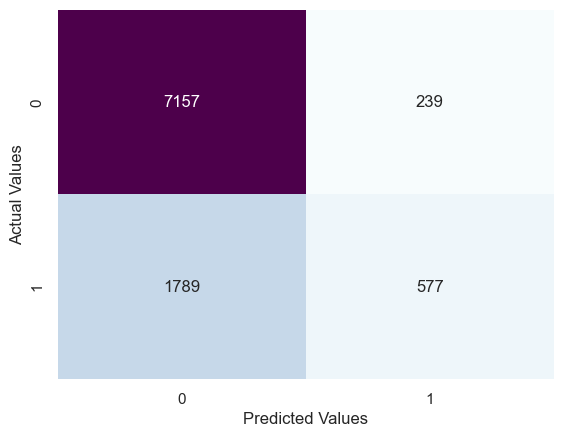


Classification report: 
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      7396
           1       0.71      0.24      0.36      2366

    accuracy                           0.79      9762
   macro avg       0.75      0.61      0.62      9762
weighted avg       0.78      0.79      0.75      9762

Accuracy of the model:  0.7922556853103873


In [406]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred_new)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()
print()

print("Classification report: ")

print(classification_report(Y_test,Y_pred_new))

acc=accuracy_score(Y_test, Y_pred_new)
print("Accuracy of the model: ",acc)

#### Feature selection using Univariate Selection

In [407]:
X = adult_df_rev.values[:,:-1]
Y = adult_df_rev.values[:,-1]

In [408]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

test = SelectKBest(score_func=chi2, k=8)
fit1 = test.fit(X, Y)

colname=adult_df_rev.columns

print(fit1.scores_)
print(list(zip(colname,fit1.get_support())))
X_new = fit1.transform(X)

[8.59031713e+03 9.41445133e-02 2.98098144e+02 9.96668120e+01
 3.65821506e+03 3.30121759e+01 5.01968535e+02 8.21362443e+07
 1.37062169e+06 6.46886542e+03 1.70998658e+01]
[('age', np.True_), ('workclass', np.False_), ('education', np.True_), ('occupation', np.True_), ('relationship', np.True_), ('race', np.False_), ('sex', np.True_), ('capital_gain', np.True_), ('capital_loss', np.True_), ('hours_per_week', np.True_), ('native_country', np.False_)]


In [409]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_new)
X = scaler.transform(X_new)

In [410]:
from sklearn.model_selection import train_test_split
#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [411]:
from sklearn.linear_model import LogisticRegression
#create a model
classifier=(LogisticRegression())
#fitting training data to the model
classifier.fit(X_train,Y_train)
Y_pred=classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

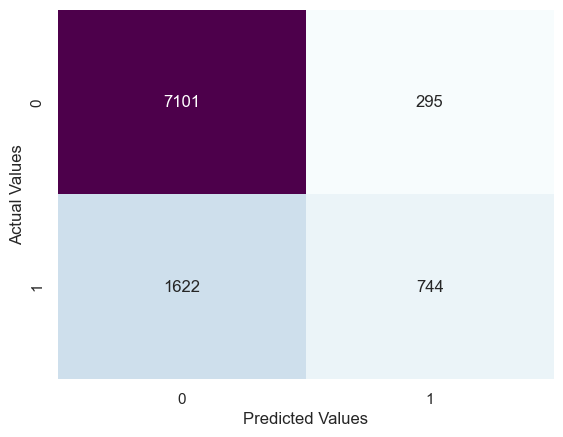


Classification report: 
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      7396
           1       0.72      0.31      0.44      2366

    accuracy                           0.80      9762
   macro avg       0.77      0.64      0.66      9762
weighted avg       0.79      0.80      0.77      9762

Accuracy of the model:  0.8036263060848187


In [412]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()
print()

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)